In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
dateFmt = mdates.DateFormatter('%H:%M')
import xarray as  xr
import trivariate as trivar
import datetime

In [13]:
AG = np.load('prop_AG_2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')#2-6_above45deg.npz')#
CR = np.load('prop_CR_2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')#2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')
RP = np.load('prop_RP_2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')#2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')
SNRH = np.load('SNRh_2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')#2-6_above45deg.npz')#JFJ_2-6_below45deg.npz')
Time = RP['Time']
Height = RP['Height']
prop_ag = AG['Profile']#[-565:]
prop_cr = CR['Profile']
prop_rp = RP['Profile']
SNRh = SNRH['Profile']#[-565:]
prop_ag[SNRh<0] = np.nan
prop_rp[SNRh<0] = np.nan
prop_cr[SNRh<0] = np.nan
t = np.unique(Time)
h = np.array(Height)

In [15]:
prop_AG = (prop_ag/(prop_ag+prop_cr+prop_rp)).T
prop_CR = (prop_cr/(prop_ag+prop_cr+prop_rp)).T
prop_RP = (prop_rp/(prop_ag+prop_cr+prop_rp)).T 

prop_RP[prop_RP<0]=0
prop_CR[prop_CR<0]=0
prop_AG[prop_AG<0]=0
prop_RP[prop_RP>1]=1
prop_CR[prop_CR>1]=1
prop_AG[prop_AG>1]=1


In [16]:
trivar.tri_colpal = trivar.trivariate_colpal("1")
trivariate_map = trivar.set_trivariate_colors(y1 = prop_AG,
                                       y2 = prop_CR,
                                       y3 = 1 - prop_CR - prop_AG,
                                       NA_fill = True, NA_color=[255,255,255],
                                       max_rgb = 1,
                                       tri_colpal = trivar.tri_colpal)


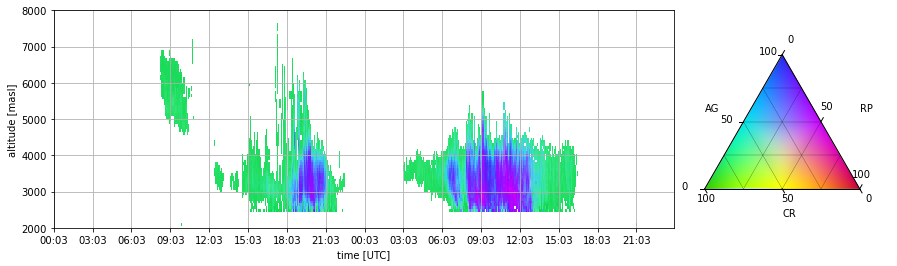

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Permutation just to make the color rendering nicer
trivariate_map2 = trivariate_map.copy()
trivariate_map2[:,:,0] = trivariate_map[:,:,1]
trivariate_map2[:,:,1] = trivariate_map[:,:,0]


fig,axes = plt.subplots(figsize=(15,4))
t = Time[:,0]
h = Height[0,:]
axes.pcolorfast(t,h+2061,trivariate_map2[:-1,:-1,:]) #pcolorfast allows to plot RGB with irregular grid
axes.set_ylim(2000.,8000)
div = make_axes_locatable(axes)
cax = div.append_axes("right", size="35%", pad=0)
trivar.plot_trivariate_colorbar(ax = cax, ticks_interval=50, grid_interval=.25,
                         tri_colpal = trivar.tri_colpal,
                         xlabel = "AG", ylabel = "RP", zlabel = "CR")

#axes.pcolormesh(t, np.linspace(0,0.1,10),np.zeros((10,len(t))))
#axes.set_xlim(t[40]-71,t[159]-87)
t_ticks = np.arange(t[0],t[-1],3*3600)
axes.set_xticks(t_ticks)
_ = axes.set_xticklabels([datetime.datetime.utcfromtimestamp(tt).strftime('%H:%M') for tt in t_ticks])
axes.set_ylabel('altitude [masl]')
axes.set_xlabel('time [UTC]')
axes.grid()
# fig.savefig('hm_timeseries_demixing_2-6kmhor_below_45deg_JFJ',dpi=300,bbox_inches='tight')